**Introduction

In this project, I would like to explore the relationship between gender, SAT score, and their GAP in freshman year of college. The data set contains a sample of 220 randomly selected students with their SAT and gpa details. We will be using this data set to show the connection how each column can affect the others, or even to figure out if there are any connections between each column. This data was downloaded from kaggle, and there are a lot of difference open resources data that has even more detailed columns of categroies. However, we found the data set we are currently using in this project fits our need the best.

**Background Information

College is the most important step of education before getting into the career. Each year, there are at least more than 10 millions of high school students applying for college within the nation, and it can be hard for students to imagine how the gatekeeper reviews college applications and what they are looking to see in the application for those who just start to prepare for college. It can be frustrating for students to make a decision without knowing where they are among the population. Therefore, our tutorial serves as a reference for students to picture how likely they are being chosen based on their own SAT score and high school GPA. Even though GPA and SAT scores are not the only indicators for gatekeepers to consider, it is the fastest way for them to consider the ability of a student. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import sklearn
from sklearn import datasets
import numpy as np
from sklearn import model_selection
from statsmodels.formula.api import logit

**Imported Library


In [12]:
data = pd.read_csv("FirstYearGPA.csv")
#remove useless row
data = data.drop(labels = "Unnamed: 0", axis = 1)
data = data.rename(columns = {"GPA": "CollegeGPA"})
data

,CollegeGPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1
...,...,...,...,...,...,...,...,...,...,...
214,3.13,3.41,700,690,1,10.0,19.0,0,1,1
215,2.88,3.58,680,740,0,20.0,3.0,0,0,1
216,2.65,3.15,590,750,1,8.5,8.5,0,1,1
217,2.97,3.09,670,630,0,12.0,4.0,0,1,1


**Data Table

This data set I am using contains a number of different categories, including the first year college GPA, the average high school GPA, the SAT verbal score, SAT math score, gender of the student, the ethnicity group of students, etc. There are total of 220 rows each represent a student what he/she gets in school and SAT. 

In [3]:
data.describe(include = "all")

,CollegeGPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,3.096164,3.452740,605.068493,634.292237,0.465753,13.108219,7.248858,0.114155,0.789954,0.922374
std,0.465476,0.374794,83.393452,75.235572,0.499969,7.224647,5.000315,0.318728,0.408274,0.268194
min,1.930000,2.340000,260.000000,430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.745000,3.170000,565.000000,580.000000,0.000000,8.000000,3.000000,0.000000,1.000000,1.000000
50%,3.150000,3.500000,610.000000,640.000000,0.000000,13.000000,6.000000,0.000000,1.000000,1.000000
75%,3.480000,3.760000,670.000000,690.000000,1.000000,17.000000,11.000000,0.000000,1.000000,1.000000
max,4.150000,4.000000,740.000000,800.000000,1.000000,40.000000,21.000000,1.000000,1.000000,1.000000


**Data Table with 5 Number Summary

The 5 number summary in this data includes min, max, Q1(25%), median, Q3, max with mean and standard deviation. Having those number available, we can easily tell how people in majority of population do in school and SAT. However, only the number itself might still seem vague for other people who is reading our tutorial. Therefore, we provided a series of the violine plot that would help people visualize that large data set below.

<AxesSubplot:xlabel='Male', ylabel='CollegeGPA'>

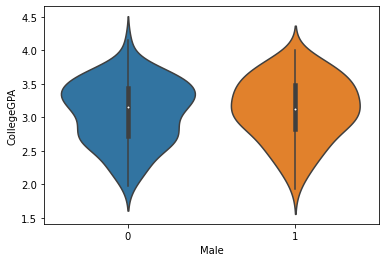

In [4]:
sns.violinplot(x = "Male", y = "CollegeGPA", data = data)

The provided violin plot above is based on the gender column of the original data table, and the it is splitted in to two plot depending on either male or female. It is very much similar to a box plot, but instead of only showing 5 number summary, volin plot can show the visulization of the entire data set better than a box plot. In this violin plot, the gender is differentiated by the color, where oriange color on the right represents male student college GAP and blue on the left representes female in this case. The distribution of the plot looks symmetric for both male and female. Looking at the shape of plot, the fatter plot gets, the more data set cluster here. In our case, both male and female students have college GPA centered between 3.0 to 3.5.  

<AxesSubplot:xlabel='FirstGen', ylabel='CollegeGPA'>

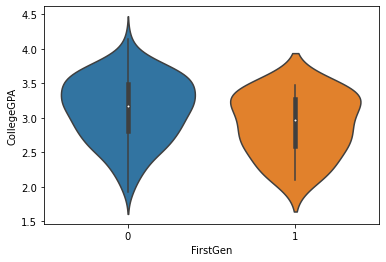

In [13]:
sns.violinplot(x = "FirstGen", y = "CollegeGPA", data = data)

In this data set, we also include a column called FirstGen, which determine if the student is native American or immagrated from somewhere else. This set can be useful for students who grew up in some other countries and pursuing college degree in the US. Comparing native American students in blue to First generation student in orange side by side, we can see the significant changes in the data. The highest GPA among those students who are first generation in the US is around 4.0 while native students have highest GPA around 4.5. There can be many different factors that affect the relation, but one important reason might be the language issues.

<AxesSubplot:xlabel='White', ylabel='CollegeGPA'>

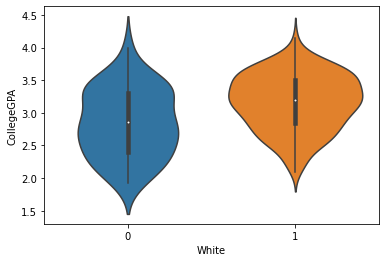

In [6]:
sns.violinplot(x = "White", y = "CollegeGPA", data = data)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


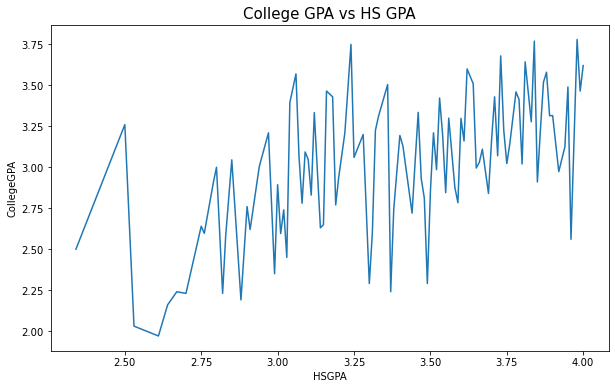

In [7]:
plt.figure(figsize = (10, 6))
plt.title("College GPA vs HS GPA", fontsize = 15)
sns.lineplot(data.HSGPA, data.CollegeGPA, ci = None)
plt.show()

Linear Regression Line: y = 0.5550124972790668x+1.1798506857645372, where y is College GPA and x is HS GPA
R-Squared Value: 0.19970830171667286


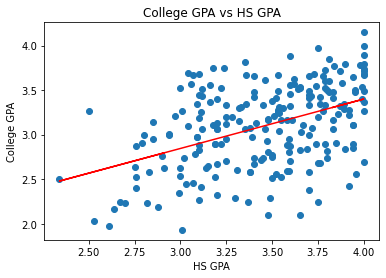

In [8]:
# A linear relationship between `x` and `y`. (same as before)
ind = []
dep = []
for index, row in data.iterrows():
    ind.append([row["HSGPA"]])
    dep.append(row["CollegeGPA"])
lm = linear_model.LinearRegression()
lm.fit(ind,dep)
fig, ax = plt.subplots()
ax.scatter(ind, dep)
ax.set_xlabel("HS GPA")
ax.set_ylabel("College GPA")
ax.set_title("College GPA vs HS GPA")
ax.plot(ind, lm.predict(ind), color = "red")
slope = lm.coef_
intercept = lm.intercept_
r_sq = lm.score(ind, dep)
print("Linear Regression Line: y = " + str(slope[0]) + "x" + (str(intercept) if intercept < 0 else "+" + str(intercept)) + ", where y is College GPA and x is HS GPA")
print("R-Squared Value: " + str(r_sq))

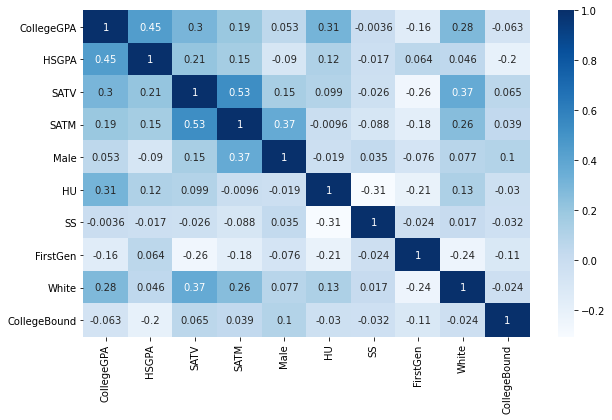

In [9]:
plt.figure(figsize = (10 ,6))
sns.heatmap(data.corr(), annot=True, cmap = "Blues")
plt.show()

In [10]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("{}".format(height),
            xy = (rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3), # 3 points vertical offset
            textcoords = "offset points",
            ha = "center", va = "bottom")

In [11]:
#k-NN Classification
from sklearn.neighbors import KNeighborsClassifier
x = np.array_split(data, 2)
y = np.array_split(data["CollegeGPA"], 2)

trainx = x[0]
testx = x[1]
trainy = y[0]
testy = y[1]

newtrainy = np.array([1]).astype(int)
newtesty = np.array([0]).astype(int)
for i in range(testy.size):
    newtrainy = np.append(newtrainy, int(trainy.get(i)))
    newtesty = np.append(newtesty, int(testy.get(i + 110)))
trainy = newtrainy
testy = newtesty
trainy = trainy.astype(int)
#trainy = np.delete(trainy, 0)
#testy = np.delete(testy, 0)

knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(sklearn.preprocessing.normalize(trainx), trainy)
estimate = knn.predict(testx)
stats = [0, 0, 0, 0]
for i in range(testy.size):
    if testy[i] == 0.0:
        if estimate[i] == 0.0:
            stats[0] += 1
        else:
            stats[1] += 1
    else:
        if estimate[i] == 1.0:
            stats[2] += 1
        else:
            stats[3] += 1
labels = ['0', '1']
men_means = [stats[0], stats[2]]
women_means = [stats[1], stats[3]]
x = np.arange(len(labels)) # the label locations
width = 0.35 # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Correct')
rects2 = ax.bar(x + width/2, women_means, width, label='Wrong')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Classifications')
ax.set_title('Classification Results')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

IndexError: index 109 is out of bounds for axis 0 with size 109